SVD(Singular Value Decomposition)
=====================================
SVD 개요
------------
SVD
- 정방행렬 뿐만 아니라 행, 열의 크기가 다른 행렬에도 적용가능
- m*n 크기의 행렬 A를 다음과 같이 분해하는 것

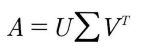

- 특이값 분해라고도 불림
- 행렬 U,V에 속한 벡터 : 특이벡터 (직교성질 지님)
- 시그마 : 대각행렬
- 행렬 A의 특이값 : 시그마가 위치한 0이 아닌 값
- A의 차원이 m *n일 때 U의 차원이 m *m, 시그마의 차원이 m *n, V^T의 차원이 n *n으로 분해됨

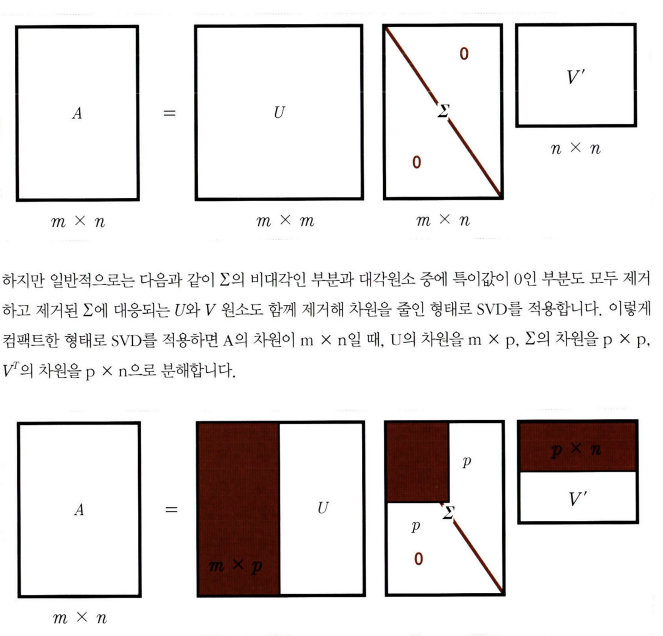

Trunscated SVD : 시그마의 대각원소 중에 상위 몇 개만 추출해서 여기에 대응하는 U와 V의 원소도 함께 제거해 더욱 차원을 줄인 형태로 분해하는 것

In [ ]:
# numpy의 svd 모듈 import
import numpy as np
from numpy.linalg import svd

# 4X4 Random 행렬 a 생성 
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a, 3))

In [ ]:
# a행렬에 SVD 적용해서 U,Sigma,Vt 도출하기

U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U, 3))
print('Sigma Value:\n',np.round(Sigma, 3))
print('V transpose matrix:\n',np.round(Vt, 3))

- U, Vt 행렬 : 4 * 4로 반환
- Sigma : 1차원 행렬인 (4,)로 반환 

In [ ]:
# pg.399: 분해된 U, Sigma, Vt를 이용해서 다시 원본행렬로 정확히 복원되는지 확인하기
# 원본 행렬로의 복원 : 내적하기 !

# Sima를 다시 0 을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

a_가 원본행렬 a와 동일하게 복원됨

In [ ]:
# pg.399: 로우 간 의존성이 있을 경우 어떻게 Sigma 값이 변하고, 이에 따른 차원 축소가 진행될 수 있는지 알아보기

a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

a 행렬이 이전과 다르게 로우 간 관계가 매우 높아짐

In [ ]:
# pg.400: 위 데이터를 SVD로 다시 분해하기

# 다시 SVD를 수행하여 Sigma 값 확인 
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n',np.round(Sigma,3))

이전과 차원은 같지만 Sigma 값 중 2개가 0으로 변함
- 선형 독립인 로우 벡터의 개수가 2개임 (행렬의 rank가 2)


In [ ]:
# pg.400 : 전체 데이터를 이용하지 않고 Sigma의 0에 대응하는 U,Sigma,Vt의 데이터를 제외하고 복원하기

# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_,Sigma_), Vt_)
print(np.round(a_, 3))

Truncated SVD
- 시그마 행렬에 있는 대각원소, 즉 특이값 중 상위 일부 데이터만 추출해 분해하는 방식
- 원본행렬을 정확하게 다시 복원할 수는 없지만 데이터 정보가 압축되어 분해됨에도 불구하고 상당한 수준으로 원본 행렬을 근사할 수 있음

In [ ]:
# pg.401: Trunscated SVD 이용해서 행렬 분해하기

import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고, SVD를 적용할 경우 U, Sigma, Vt 의 차원 확인 
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n',matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행. 
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)), Vt_tr)  # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

- 6* 6 행렬을 SVD 분해하면 U,Sigma,Vt가 각각 (6,6) (6,) (6,6) 차원
- Truncated SVD의 n_components를 4로 설정해 U,Sigma,Vt를 각각 (6,4) (4,) (4,6)으로 분해함

사이킷런 TruncatedSVD 클래스를 이용한 변환
--------------------------------------------
사이킷런의 TruncatedSVD 클래스
- PCA클래스와 유사하게 fit()와 transform() 호출해서 원본 데이터를 몇 개의 주요 컴포넌트(즉, Truncated SVD의 K 컴포넌트 수)로 차원 축소해서 변환함

In [ ]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

TruncatedSVD변환 역시 PCA와 유사하게 변환 후에 각 변환 속성으로 뛰어난 고유성을 가지고 있음

In [ ]:
# pg.403: 붓꽃 데이터 스케일링으로 변환 + 변환해서 두 개 비교

from sklearn.preprocessing import StandardScaler

# 붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행 
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행 
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현 
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
ax2.scatter(x=iris_pca[:,0], y= iris_pca[:,1], c= iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

In [ ]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

- 0에 가까운 값으로 2개의 변환이 거의 동일함

데이터 세트가 스케일링으로 데이터 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일변환 수행함

NMF(Non-Negative Matrix Factorization)
=========================================
NMF 개요
----------
NMF
- Truncated SVD와 같이 낮은 랭크를 통한 행렬근사 방식의 변형
- 원본 행렬 내의 모든 원소 값이 모두 양수라는 게 보장되면 다음과 같이 좀 더 간단하게 두 개의 기반 양수 행렬로 분해될 수 있는 기법 지칭

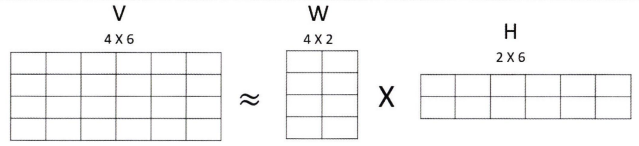

원본행렬 V는 행렬 W와 행렬 H로 근사해 분해됨

행렬 분해 (Matrix Factorization) : 행렬 분해 기법을 통칭

분해 행렬 W : 원본 행에 대해 잠재 요소의 값이 얼마나 되는지에 대응됨

분해 행렬 H : 잠재 요소가 원본 열로 어떻게 구성됐는지를 나타냄

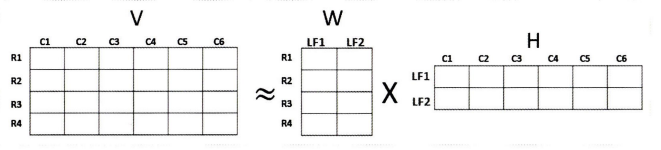

In [ ]:
# pg.406: 붓꽃 데이터를 NMF 이용해 2개의 컴포넌트로 변환 + 시각화

from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y= iris_nmf[:,1], c= iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

plt.show()